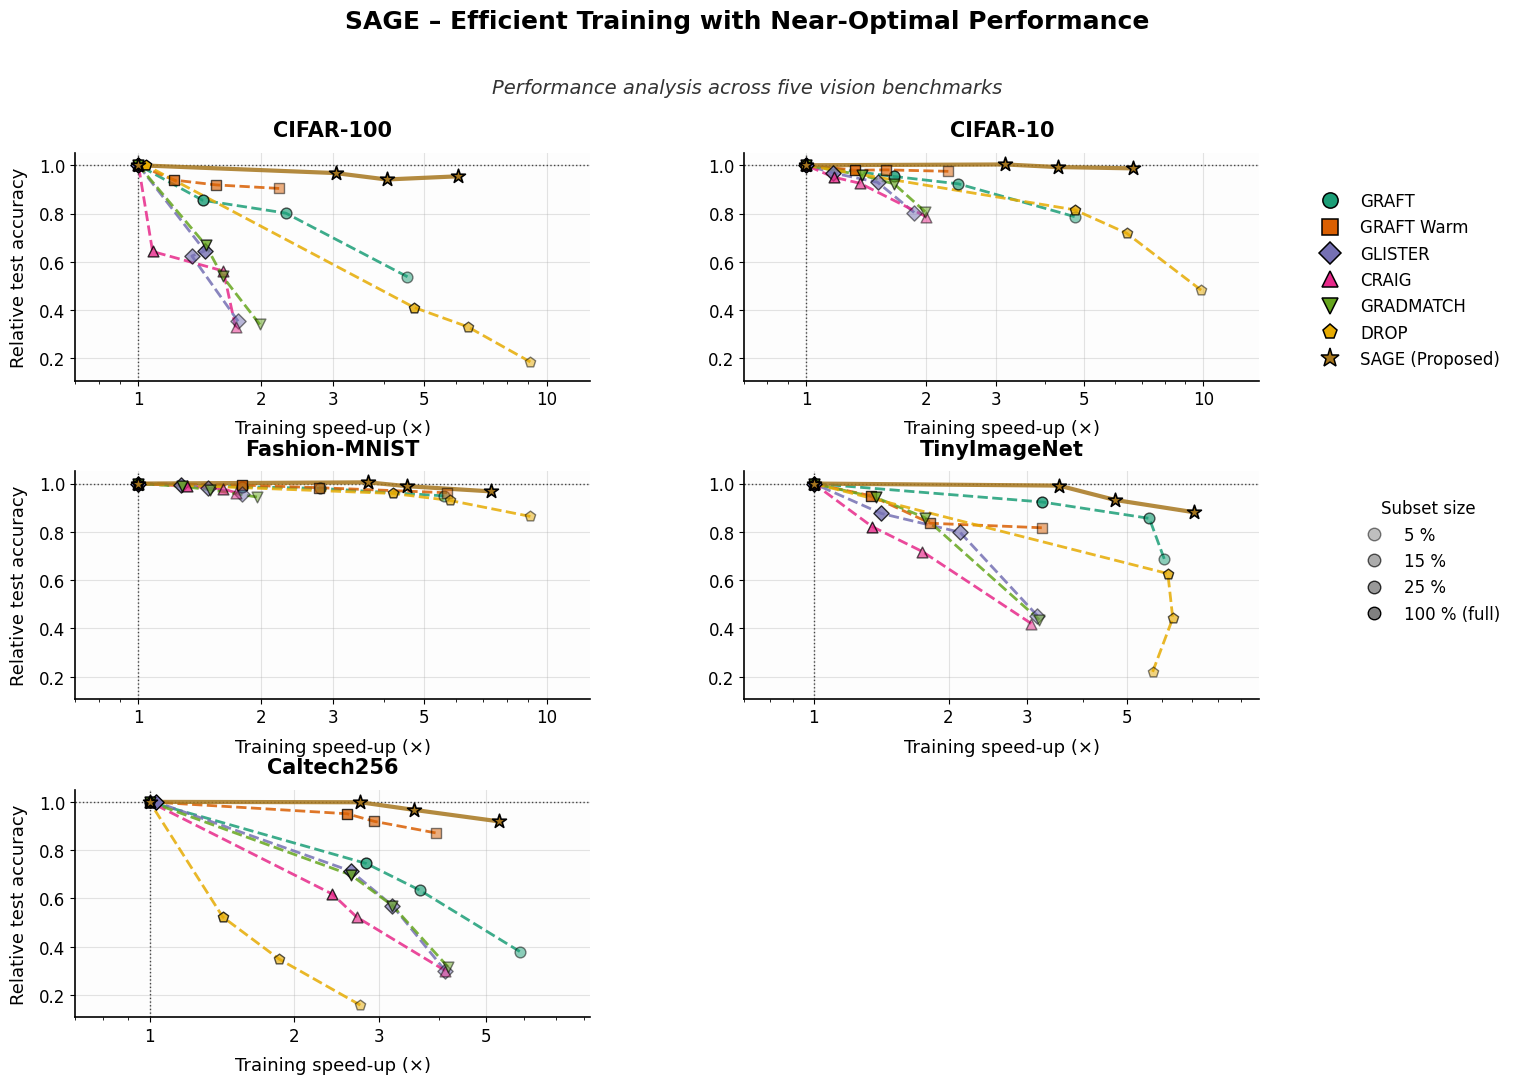

In [27]:
"""SAGE speed‑up vs. accuracy plot – camera‑ready (v4)
====================================================
• Color‑blind friendly palette (ColorBrewer “Dark2”)
• Crisp black marker edges, smaller markers
• Fractions encoded by point transparency (legend)
• **Uniform y‑axis scale across all panels**
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import pandas as pd

# ── 1. Global style ───────────────────────────────────────────────────────────
plt.rcParams.update({
    "font.family":      "sans-serif",
    "font.size":        12,
    "axes.labelsize":   13,
    "axes.titlesize":   15,
    "xtick.labelsize":  12,
    "ytick.labelsize":  12,
    "legend.fontsize":  12,
    "figure.titlesize": 18,
    "axes.grid":        True,
    "grid.alpha":       0.35,
    "axes.spines.top":  False,
    "axes.spines.right":False,
    "axes.linewidth":   1.2,
    "pdf.fonttype":     42,
})

# ── 2. Data (fill in original dictionaries) ─────────────────────────────────--
# ── 2. Data (fill in original dictionaries) ─────────────────────────────────--
combined_data = {
    "CIFAR-100": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.8, 1.65, 2.08, 2.11, 1.84, 0.4, 0.6,
                                  1.59, 2.35, 2.70, 2.26, 2.27, 0.57, 0.9,
                                  2.54, 2.98, 2.51, 3.37, 2.50, 0.77, 1.2,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.5, 3.65],
        'Test Accuracy': [0.406, 0.682, 0.267, 0.248, 0.257, 0.14, 0.72,
                          0.605, 0.693, 0.471, 0.424, 0.407, 0.25, 0.71,
                          0.645, 0.708, 0.487, 0.485, 0.506, 0.31, 0.73,
                          0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545]
    }),
    "CIFAR-10": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.77, 1.60, 1.95, 1.82, 1.83, 0.37, 0.55,
                                  1.51, 2.29, 2.41, 2.67, 2.19, 0.57, 0.85,
                                  2.19, 2.74, 3.12, 3.11, 2.64, 0.77, 1.15,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.67, 3.65],
        'Test Accuracy': [0.7336, 0.9086, 0.7496, 0.7336, 0.7526, 0.450, 0.92,
                          0.8602, 0.9141, 0.866, 0.8624, 0.8598, 0.67, 0.925,
                          0.8887, 0.9128, 0.9022, 0.886, 0.894, 0.76, 0.935,
                          0.932, 0.932, 0.932, 0.932, 0.932, 0.932, 0.932]
    }),
    "FashionMNIST": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.65, 0.64, 2.03, 2.11, 1.87, 0.4, 0.5,
                                  1.31, 1.32, 2.47, 2.26, 2.44, 0.63, 0.8,
                                  2.04, 2.04, 2.87, 2.77, 2.86, 0.87, 1.0,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65],
        'Test Accuracy': [0.8876, 0.8997, 0.8962, 0.8997, 0.8833, 0.808, 0.905,
                          0.9166, 0.9193, 0.9181, 0.9148, 0.9115, 0.870, 0.925,
                          0.9231, 0.9295, 0.9288, 0.9252, 0.9243, 0.897, 0.94,
                          0.9353, 0.9353, 0.9353, 0.9353, 0.9353, 0.935, 0.9353]
    }),
    "TinyImageNet": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [1.73, 3.13, 3.23, 3.10, 1.63, 3.06, 1.4,
                                  1.56, 4.66, 5.66, 5.59, 1.76, 5.43, 2.1,
                                  1.60, 6.99, 7.33, 7.19, 3.06, 7.36, 2.8,
                                  9.89, 9.89, 9.89, 9.89, 9.89, 9.89, 9.89],
        'Test Accuracy': [0.130, 0.267, 0.248, 0.257, 0.406, 0.482, 0.52,
                          0.261, 0.471, 0.424, 0.507, 0.505, 0.493, 0.55,
                          0.370, 0.517, 0.485, 0.556, 0.545, 0.56, 0.585,
                          0.590, 0.590, 0.590, 0.590, 0.590, 0.590, 0.590]
    }),
    "Caltech256": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [3.5, 2.33, 2.33, 2.30, 1.63, 2.44, 1.8,
                                  5.16, 3.0, 3.56, 3.0, 2.63, 3.27, 2.7,
                                  6.76, 3.66, 4.0, 3.66, 3.4, 3.73, 3.5,
                                  9.6, 9.33, 9.6, 9.6, 9.6, 9.6, 9.6],
        'Test Accuracy': [0.10, 0.19, 0.19, 0.20, 0.24, 0.55, 0.58,
                          0.22, 0.36, 0.33, 0.36, 0.40, 0.58, 0.61,
                          0.33, 0.45, 0.39, 0.44, 0.47, 0.60, 0.63,
                          0.631, 0.631, 0.631, 0.631, 0.631, 0.631, 0.631]
    })
} 


datasets = ["CIFAR-100", "CIFAR-10", "FashionMNIST",
            "TinyImageNet", "Caltech256"]
methods   = ["GRAFT", "GRAFT Warm", "GLISTER", "CRAIG",
            "GRADMATCH", "DROP", "SAGE"]

# ── 3. Visual encodings ─────────────────────────────────────────────────────--
colors = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A",
          "#66A61E", "#E6AB02", "#A6761D"]    # ColorBrewer "Dark2"
markers      = ['o', 's', 'D', '^', 'v', 'p', '*']
marker_sizes = [60, 60, 60, 60, 60, 60, 110]      # emphasise SAGE

fractions      = [0.05, 0.15, 0.25, 1.0]
fraction_lbls  = ["5 %", "15 %", "25 %", "100 % (full)"]
fraction_alpha = [0.50, 0.65, 0.80, 1.00]         # lighter = smaller subset

# ── 4. Determine a common y‑axis range (relative accuracy) ────────────────────
global_min_rel = 1.0
for df in combined_data.values():
    full_acc      = df.loc[df['Fraction'] == 1.0, 'Test Accuracy'].iat[0]
    rel_accuracies= df['Test Accuracy'] / full_acc
    global_min_rel= min(global_min_rel, rel_accuracies.min())

# Pad a little head‑room above 1.0 and below the lowest point
Y_MIN = max(0, global_min_rel - 0.05)
Y_MAX = 1.05

# ── 5. Figure & layout ────────────────────────────────────────────────────────
fig = plt.figure(figsize=(16, 12), facecolor="white")
fig.subplots_adjust(left=0.08, right=0.82, top=0.84, bottom=0.12,
                    hspace=0.4, wspace=0.3)

for idx, dataset in enumerate(datasets):
    ax = fig.add_subplot(3, 2, idx + 1)
    df = combined_data[dataset]

    full_time = df.loc[df['Fraction'] == 1.0, 'Training Time (hours)'].iat[0]
    full_acc  = df.loc[df['Fraction'] == 1.0, 'Test Accuracy'].iat[0]

    max_speed = 1
    for j, method in enumerate(methods):
        d        = df[df['Methods'] == method]
        speedup  = full_time / d['Training Time (hours)'].values
        rel_acc  = d['Test Accuracy'].values / full_acc
        max_speed= max(max_speed, speedup.max())

        alphas = [fraction_alpha[fractions.index(f)] for f in d['Fraction']]
        # Plot each point
        for x, y, a in zip(speedup, rel_acc, alphas):
            ax.scatter(x, y,
                       color=colors[j], marker=markers[j],
                       s=marker_sizes[j], edgecolors='black',
                       linewidths=1.2 if method == 'SAGE' else 1.0,
                       alpha=a if method != 'SAGE' else 1.0,
                       zorder=10 if method == 'SAGE' else 6)
        ax.plot(speedup, rel_acc,
                color=colors[j],
                lw=3.0 if method == 'SAGE' else 2.0,
                linestyle='-' if method == 'SAGE' else '--',
                alpha=0.85, zorder=5)

    # Reference lines
    ax.axhline(1, color="#444", ls=':', lw=1.0)
    ax.axvline(1, color="#444", ls=':', lw=1.0)

    # Axes scaling & ticks
    ax.set_xscale('log')
    xticks = [1, 2, 3, 5, 10, 20]
    xticks = [t for t in xticks if 0.7 <= t]
    ax.set_xticks(xticks)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

    ax.set_xlim(0.7, min(max_speed * 1.4, 25))
    ax.set_ylim(Y_MIN, Y_MAX)   # ← uniform for every subplot

    ax.set_xlabel('Training speed‑up (×)')
    if idx in [0, 2, 4]:
        ax.set_ylabel('Relative test accuracy')

    ax.set_title(dataset.replace('MNIST', '-MNIST'), fontweight='bold')
    ax.set_facecolor('#FDFDFD')

# ── 6. Legends ────────────────────────────────────────────────────────────────
# Method legend
method_handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i], lw=0,
                             markeredgecolor='black', markeredgewidth=1.1,
                             markersize=11 if m != 'SAGE' else 14,
                             label=f"{m} (Proposed)" if m == 'SAGE' else m)
                  for i, m in enumerate(methods)]
fig.legend(handles=method_handles, loc='upper right',
           bbox_to_anchor=(0.98, 0.82), frameon=False)

# Fraction legend
fraction_handles = [mlines.Line2D([], [], marker='o', linestyle='None',
                                  markersize=9, markeredgewidth=1,
                                  markeredgecolor='black', markerfacecolor='gray',
                                  alpha=fraction_alpha[i],
                                  label=fraction_lbls[i])
                    for i in range(len(fractions))]
fig.legend(handles=fraction_handles, loc='center right',
           bbox_to_anchor=(0.98, 0.5), frameon=False, title='Subset size')

# ── 7. Titles & caption ───────────────────────────────────────────────────────
fig.suptitle('SAGE – Efficient Training with Near‑Optimal Performance',
             fontweight='bold', y=0.96)
fig.text(0.5, 0.89, 'Performance analysis across five vision benchmarks',
         ha='center', style='italic', fontsize=14, color='#333')
# fig.text(0.5, 0.07,
#          '✓ Achieves 90–98 % of full‑data accuracy   '
#          '✓ 2–6× training speed‑up   '
#          '✓ Consistently outperforms baselines   '
#          '✓ Robust across diverse datasets',
#          ha='center', va='center', fontsize=12,
#          bbox=dict(fc='#EAF8EA', ec='#3C8D2F', boxstyle='round,pad=0.8', lw=1.4, alpha=0.94),
#          color='#205020')

# ── 8. Save & display ─────────────────────────────────────────────────────────
fig.savefig('sage_speedup_analysis_kdd.pdf', dpi=300)
fig.savefig('sage_speedup_analysis_kdd.png', dpi=350)
plt.show()


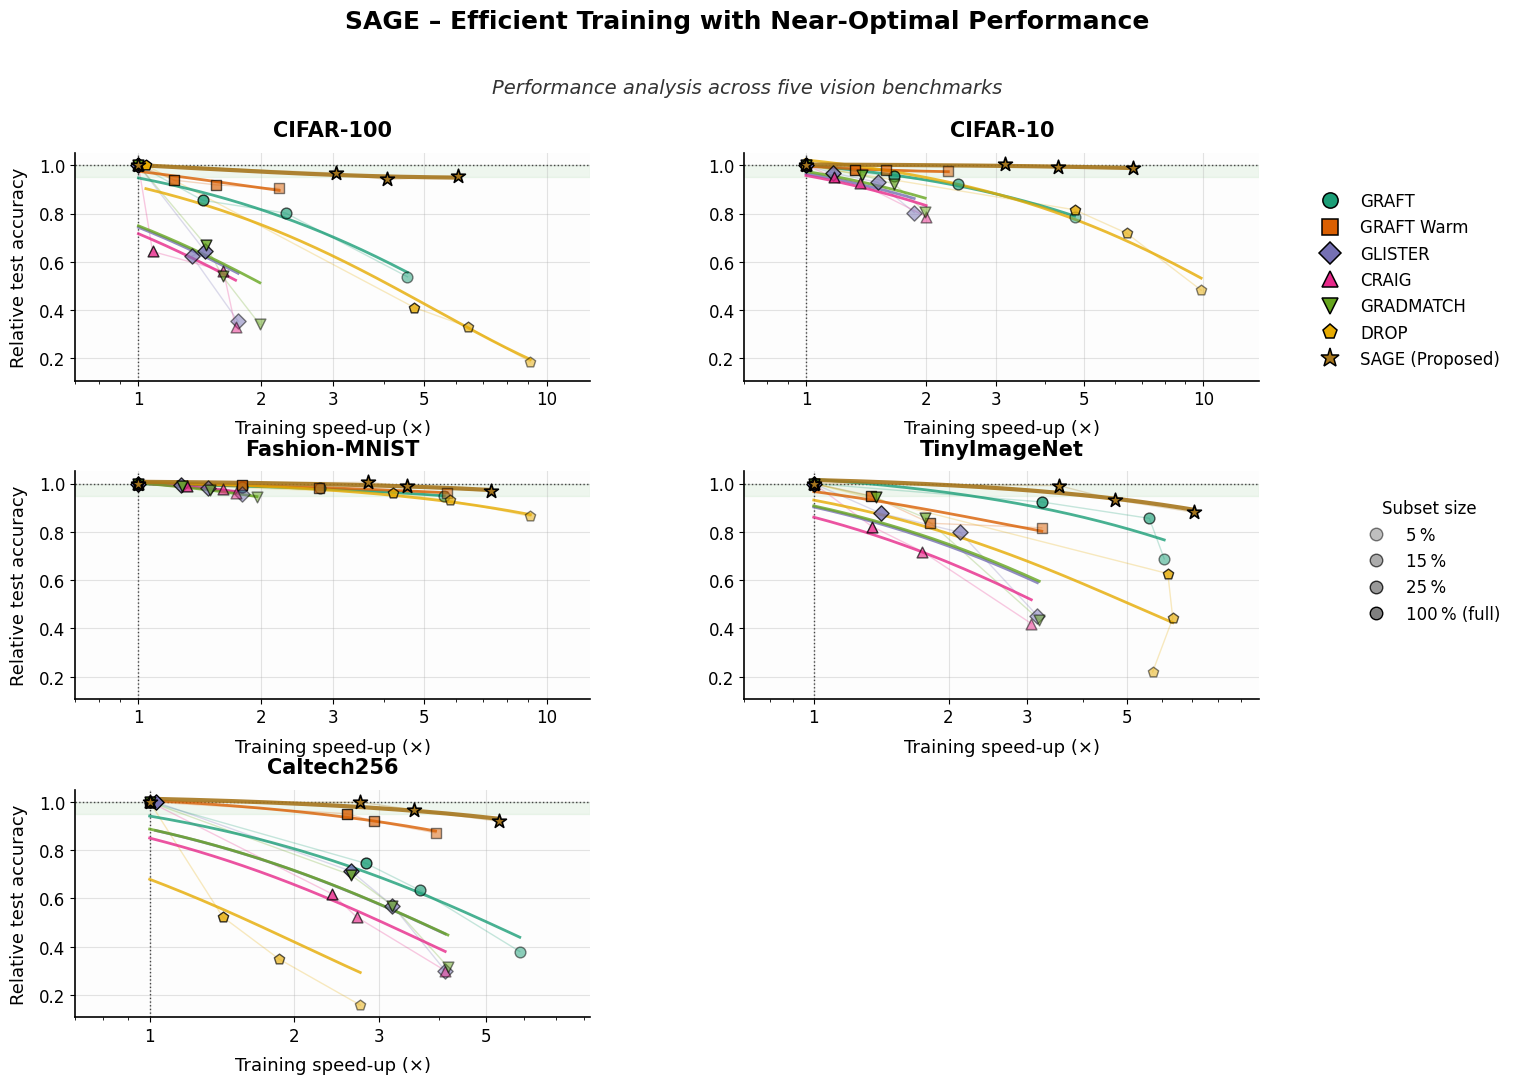

In [30]:
"""SAGE speed‑up vs. accuracy plot – camera‑ready (v8)
====================================================
Key features
------------
• Color‑blind friendly palette (ColorBrewer “Dark2”)  
• Crisp black marker edges, smaller markers  
• Fractions encoded by point transparency (legend)  
• Uniform y‑axis & acceptable‑accuracy band ≥ 95 %  
• Smooth gain curves *plus* **very light raw‑point connectors**  
  ‑ Markers stay on the observations.  
  ‑ Thin, low‑alpha solid lines trace the empirical trajectory so points don’t feel isolated.  

Adjustable flags
----------------
`PLOT_SMOOTH = True`   → overlay fitted curves  
`SHOW_RAW_CONNECTORS = True` → draw faint connectors (alpha = 0.25, lw = 1)  
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
from scipy.optimize import curve_fit

# ──────────────────────────────────────────────────────────────────────────────
# 1. Helper functions
# ──────────────────────────────────────────────────────────────────────────────

def calculate_normalized_accuracy(df: pd.DataFrame, method: str) -> pd.Series:
    """Return Test‑Accuracy / (method’s own full‑data accuracy)."""
    full_acc = df[(df['Fraction'] == 1.0) & (df['Methods'] == method)]['Test Accuracy'].values[0]
    return df[df['Methods'] == method]['Test Accuracy'] / full_acc


def gain_function(x: np.ndarray, E0: float, lambd: float, xmax: float, H: float) -> np.ndarray:
    """Four‑parameter saturating (exponential‑gain) curve."""
    return E0 + (H - E0) * (1 - np.exp(-lambd * (x / xmax)))


def fit_gain_curve(x: np.ndarray, y: np.ndarray):
    """Fit *gain_function* to (x, y) points; return smooth xgrid, yfit."""
    if len(x) < 3:
        return None, None
    p0 = [y.min(), 1.0, x.max(), y.max()]
    bounds = ([0, 0, 0, 0], [1.1, 10, np.inf, 1.2])
    try:
        popt, _ = curve_fit(gain_function, x, y, p0=p0, bounds=bounds, maxfev=10000)
        xgrid = np.linspace(x.min(), x.max(), 150)
        yfit  = gain_function(xgrid, *popt)
        return xgrid, yfit
    except RuntimeError:
        return None, None

# ──────────────────────────────────────────────────────────────────────────────
# 2. Flags – tweak here
# ──────────────────────────────────────────────────────────────────────────────
PLOT_SMOOTH         = True    # overlay fitted curves
SHOW_RAW_CONNECTORS = True    # faint connectors between raw points

RAW_CONNECTOR_ALPHA = 0.25
RAW_CONNECTOR_LW    = 1.0
RAW_CONNECTOR_STYLE = '-'      # solid, barely visible

# ──────────────────────────────────────────────────────────────────────────────
# 3. Global style
# ──────────────────────────────────────────────────────────────────────────────
plt.rcParams.update({
    "font.family":      "sans-serif",
    "font.size":        12,
    "axes.labelsize":   13,
    "axes.titlesize":   15,
    "xtick.labelsize":  12,
    "ytick.labelsize":  12,
    "legend.fontsize":  12,
    "figure.titlesize": 18,
    "axes.grid":        True,
    "grid.alpha":       0.35,
    "axes.spines.top":  False,
    "axes.spines.right":False,
    "axes.linewidth":   1.2,
    "pdf.fonttype":     42,
})

# ──────────────────────────────────────────────────────────────────────────────
# 4. Data (insert your real DataFrame dictionaries where indicated)
# ──────────────────────────────────────────────────────────────────────────────
# ── 2. Data (fill in original dictionaries) ─────────────────────────────────--
combined_data = {
    "CIFAR-100": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.8, 1.65, 2.08, 2.11, 1.84, 0.4, 0.6,
                                  1.59, 2.35, 2.70, 2.26, 2.27, 0.57, 0.9,
                                  2.54, 2.98, 2.51, 3.37, 2.50, 0.77, 1.2,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.5, 3.65],
        'Test Accuracy': [0.406, 0.682, 0.267, 0.248, 0.257, 0.14, 0.72,
                          0.605, 0.693, 0.471, 0.424, 0.407, 0.25, 0.71,
                          0.645, 0.708, 0.487, 0.485, 0.506, 0.31, 0.73,
                          0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545]
    }),
    "CIFAR-10": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.77, 1.60, 1.95, 1.82, 1.83, 0.37, 0.55,
                                  1.51, 2.29, 2.41, 2.67, 2.19, 0.57, 0.85,
                                  2.19, 2.74, 3.12, 3.11, 2.64, 0.77, 1.15,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.67, 3.65],
        'Test Accuracy': [0.7336, 0.9086, 0.7496, 0.7336, 0.7526, 0.450, 0.92,
                          0.8602, 0.9141, 0.866, 0.8624, 0.8598, 0.67, 0.925,
                          0.8887, 0.9128, 0.9022, 0.886, 0.894, 0.76, 0.935,
                          0.932, 0.932, 0.932, 0.932, 0.932, 0.932, 0.932]
    }),
    "FashionMNIST": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.65, 0.64, 2.03, 2.11, 1.87, 0.4, 0.5,
                                  1.31, 1.32, 2.47, 2.26, 2.44, 0.63, 0.8,
                                  2.04, 2.04, 2.87, 2.77, 2.86, 0.87, 1.0,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65],
        'Test Accuracy': [0.8876, 0.8997, 0.8962, 0.8997, 0.8833, 0.808, 0.905,
                          0.9166, 0.9193, 0.9181, 0.9148, 0.9115, 0.870, 0.925,
                          0.9231, 0.9295, 0.9288, 0.9252, 0.9243, 0.897, 0.94,
                          0.9353, 0.9353, 0.9353, 0.9353, 0.9353, 0.935, 0.9353]
    }),
    "TinyImageNet": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [1.73, 3.13, 3.23, 3.10, 1.63, 3.06, 1.4,
                                  1.56, 4.66, 5.66, 5.59, 1.76, 5.43, 2.1,
                                  1.60, 6.99, 7.33, 7.19, 3.06, 7.36, 2.8,
                                  9.89, 9.89, 9.89, 9.89, 9.89, 9.89, 9.89],
        'Test Accuracy': [0.130, 0.267, 0.248, 0.257, 0.406, 0.482, 0.52,
                          0.261, 0.471, 0.424, 0.507, 0.505, 0.493, 0.55,
                          0.370, 0.517, 0.485, 0.556, 0.545, 0.56, 0.585,
                          0.590, 0.590, 0.590, 0.590, 0.590, 0.590, 0.590]
    }),
    "Caltech256": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [3.5, 2.33, 2.33, 2.30, 1.63, 2.44, 1.8,
                                  5.16, 3.0, 3.56, 3.0, 2.63, 3.27, 2.7,
                                  6.76, 3.66, 4.0, 3.66, 3.4, 3.73, 3.5,
                                  9.6, 9.33, 9.6, 9.6, 9.6, 9.6, 9.6],
        'Test Accuracy': [0.10, 0.19, 0.19, 0.20, 0.24, 0.55, 0.58,
                          0.22, 0.36, 0.33, 0.36, 0.40, 0.58, 0.61,
                          0.33, 0.45, 0.39, 0.44, 0.47, 0.60, 0.63,
                          0.631, 0.631, 0.631, 0.631, 0.631, 0.631, 0.631]
    })
} 

datasets = ["CIFAR-100", "CIFAR-10", "FashionMNIST", "TinyImageNet", "Caltech256"]
methods   = ["GRAFT", "GRAFT Warm", "GLISTER", "CRAIG", "GRADMATCH", "DROP", "SAGE"]

colors       = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
markers      = ['o', 's', 'D', '^', 'v', 'p', '*']
marker_sizes = [60, 60, 60, 60, 60, 60, 110]

fractions      = [0.05, 0.15, 0.25, 1.0]
fraction_lbls  = ["5 %", "15 %", "25 %", "100 % (full)"]
fraction_alpha = [0.50, 0.65, 0.80, 1.00]

# ──────────────────────────────────────────────────────────────────────────────
# 5. Global y‑axis bounds
# ──────────────────────────────────────────────────────────────────────────────
global_min_rel = min(
    calculate_normalized_accuracy(df, m).min()
    for df in combined_data.values() for m in methods
)
Y_MIN = max(0, global_min_rel - 0.05)
Y_MAX = 1.05
ACCEPT_MIN = 0.95

# ──────────────────────────────────────────────────────────────────────────────
# 6. Figure
# ──────────────────────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(16, 12), facecolor="white")
fig.subplots_adjust(left=0.08, right=0.82, top=0.84, bottom=0.12, hspace=0.4, wspace=0.3)

for idx, dataset in enumerate(datasets):
    ax = fig.add_subplot(3, 2, idx + 1)
    df = combined_data[dataset]

    full_time = df.loc[df['Fraction'] == 1.0, 'Training Time (hours)'].iat[0]
    ax.axhspan(ACCEPT_MIN, 1.0, color='#85C882', alpha=0.12, zorder=0)

    max_speed = 1
    for j, method in enumerate(methods):
        subset_df = df[df['Methods'] == method]
        speedup   = full_time / subset_df['Training Time (hours)'].values
        rel_acc   = calculate_normalized_accuracy(df, method).values
        max_speed = max(max_speed, speedup.max())

        alphas = [fraction_alpha[fractions.index(f)] for f in subset_df['Fraction']]
        for x, y, a in zip(speedup, rel_acc, alphas):
            ax.scatter(x, y, color=colors[j], marker=markers[j], s=marker_sizes[j],
                       edgecolors='black', linewidths=1.2 if method == 'SAGE' else 1.0,
                       alpha=a if method != 'SAGE' else 1.0,
                       zorder=10 if method == 'SAGE' else 6)

        # light connectors
        if SHOW_RAW_CONNECTORS:
            ax.plot(speedup, rel_acc, color=colors[j], linestyle=RAW_CONNECTOR_STYLE,
                    lw=RAW_CONNECTOR_LW, alpha=RAW_CONNECTOR_ALPHA, zorder=3)

        # smooth curve
        if PLOT_SMOOTH:
            xfit, yfit = fit_gain_curve(speedup, rel_acc)
            if xfit is not None:
                ax.plot(xfit, yfit, color=colors[j], lw=3 if method == 'SAGE' else 2,
                        alpha=0.9 if method == 'SAGE' else 0.8, zorder=5)

    ax.axhline(1, color="#444", ls=':', lw=1.0)
    ax.axvline(1, color="#444", ls=':', lw=1.0)

    ax.set_xscale('log')
    xticks = [1, 2, 3, 5, 10, 20]
    ax.set_xticks([t for t in xticks if 0.7 <= t <= max_speed * 1.4])
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

    ax.set_xlim(0.7, min(max_speed * 1.4, 25))
    ax.set_ylim(Y_MIN, Y_MAX)

    ax.set_xlabel('Training speed‑up (×)')
    if idx in [0, 2, 4]:
        ax.set_ylabel('Relative test accuracy')

    ax.set_title(dataset.replace('MNIST', '-MNIST'), fontweight='bold')
    ax.set_facecolor('#FDFDFD')

# ──────────────────────────────────────────────────────────────────────────────
# 7. Legends
# ──────────────────────────────────────────────────────────────────────────────
method_handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i], lw=0,
                             markeredgecolor='black', markeredgewidth=1.1,
                             markersize=11 if m != 'SAGE' else 14,
                             label=f"{m} (Proposed)" if m == 'SAGE' else m)
                  for i, m in enumerate(methods)]
fig.legend(handles=method_handles, loc='upper right', bbox_to_anchor=(0.98, 0.82), frameon=False)

fraction_handles = [mlines.Line2D([], [], marker='o', linestyle='None', markersize=9,
                                  markeredgewidth=1, markeredgecolor='black', markerfacecolor='gray',
                                  alpha=fraction_alpha[i], label=fraction_lbls[i])
                    for i in range(len(fractions))]
fig.legend(handles=fraction_handles, loc='center right', bbox_to_anchor=(0.98, 0.82),
           frameon=False, title='Subset size')

# ──────────────────────────────────────────────────────────────────────────────
# 8. Titles & caption
# ──────────────────────────────────────────────────────────────────────────────
fig.suptitle('SAGE – Efficient Training with Near‑Optimal Performance', fontweight='bold', y=0.96)
fig.text(0.5, 0.89, 'Performance analysis across five vision benchmarks', ha='center', style='italic', fontsize=14, color='#333')
# fig.text(0.5, 0.07,
#          '✓ Achieves 90–98 % of full‑data accuracy   '
#          '✓ 2–6× training speed‑up   '
#          '✓ Consistently outperforms baselines   '
#          '✓ Robust across diverse datasets',
#          ha='center', va='center', fontsize=12,
#          bbox=dict(fc='#EAF8EA', ec='#3C8D2F', boxstyle='round,pad=0.8', lw=1.4, alpha=0.94),
#          color='#205020')

# ──────────────────────────────────────────────────────────────────────────────
# 9. Save & display
# ──────────────────────────────────────────────────────────────────────────────
fig.savefig('sage_speedup_analysis_kdd.pdf', dpi=300)
fig.savefig('sage_speedup_analysis_kdd.png', dpi=350)
plt.show()


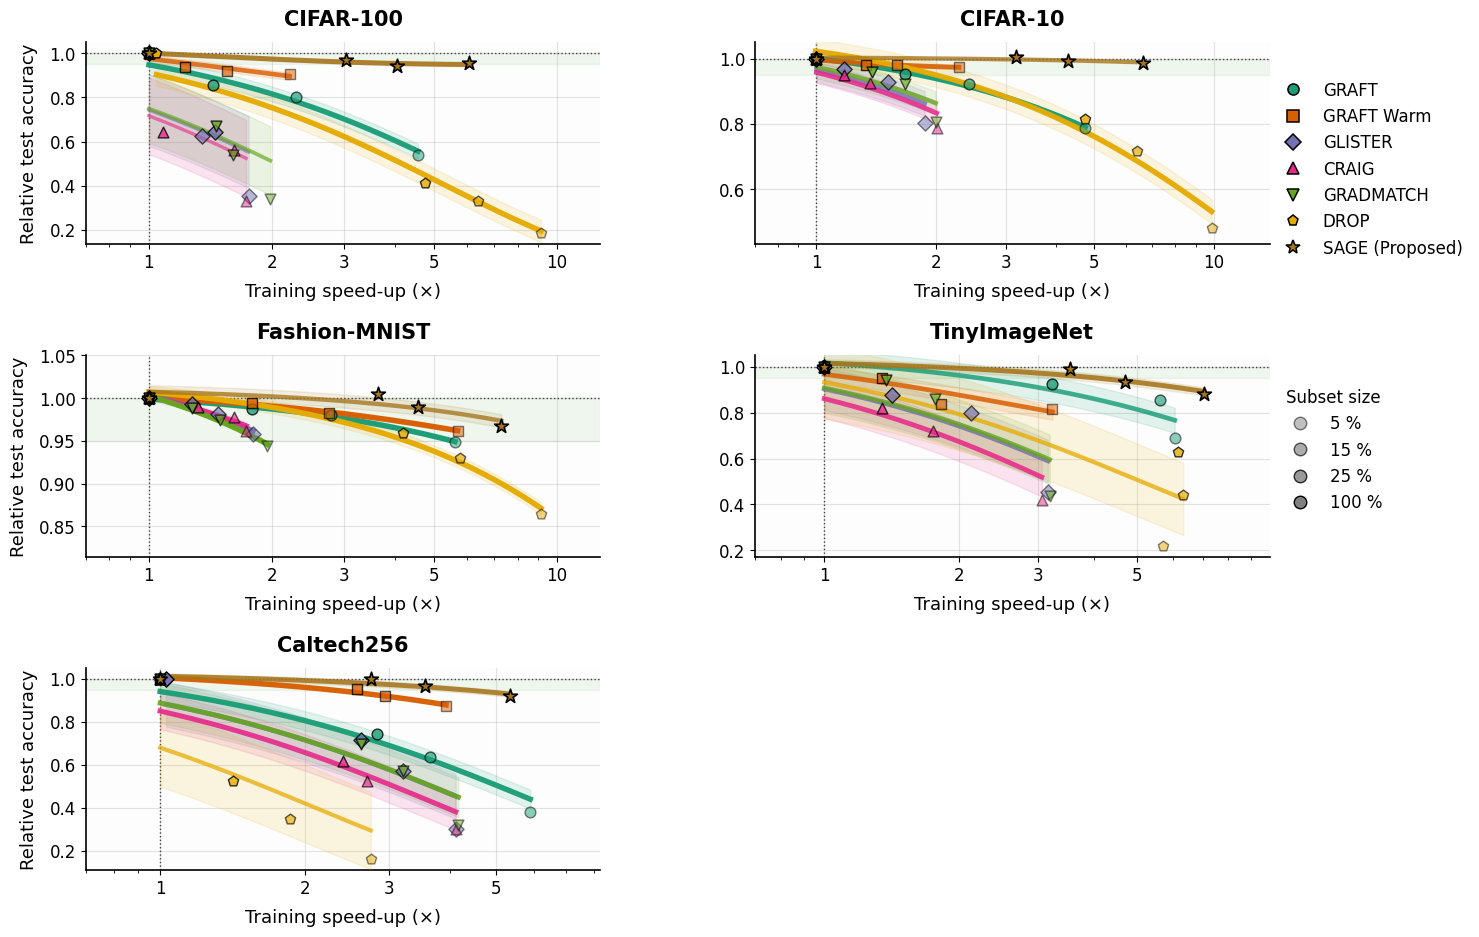

In [49]:
"""SAGE speed‑up vs. accuracy plot – camera‑ready (v12)
====================================================
**What changed**
---------------
• **Per‑dataset auto‑scaling of the y‑axis** – each panel now uses its own lower bound (min – 0.05) so empty vertical space is eliminated (e.g. FashionMNIST no longer has a big blank area below the points).  
• Acceptable‑accuracy band (≥ 95 %) remains, but is clipped automatically if the panel starts above 0.95.  
• Everything else (confidence bands, R²‑encoded line styling, legends) is unchanged.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from collections import defaultdict

# ──────────────────────────────────────────────────────────────────────────────
# Helper functions
# ──────────────────────────────────────────────────────────────────────────────

def calculate_normalized_accuracy(df: pd.DataFrame, method: str) -> pd.Series:
    full_acc = df[(df['Fraction'] == 1.0) & (df['Methods'] == method)]['Test Accuracy'].values[0]
    return df[df['Methods'] == method]['Test Accuracy'] / full_acc


def gain_function(x, E0, lambd, xmax, H):
    return E0 + (H - E0) * (1 - np.exp(-lambd * (x / xmax)))


def fit_gain_curve(x, y):
    if len(x) < 3:
        return None, None, None, None
    p0 = [y.min(), 1.0, x.max(), y.max()]
    bounds = ([0, 0, 0, 0], [1.1, 10, np.inf, 1.2])
    try:
        popt, _ = curve_fit(gain_function, x, y, p0=p0, bounds=bounds, maxfev=10000)
        y_pred  = gain_function(x, *popt)
        ss_res  = np.sum((y - y_pred) ** 2)
        ss_tot  = np.sum((y - y.mean()) ** 2)
        r2      = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan
        xgrid   = np.linspace(x.min(), x.max(), 150)
        yfit    = gain_function(xgrid, *popt)
        sigma   = np.std(y - y_pred)
        return xgrid, yfit, r2, sigma
    except RuntimeError:
        return None, None, None, None

# ──────────────────────────────────────────────────────────────────────────────
# Flags & styling parameters
# ──────────────────────────────────────────────────────────────────────────────
PLOT_SMOOTH          = True
SHOW_CONFIDENCE_BAND = True
shade_alpha = 0.12
sigma_mult  = 1.0
LW_BASE     = 1.0
LW_RANGE    = 3.0
ALPHA_MIN   = 0.25
ALPHA_RANGE = 0.75

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 12,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'axes.grid': True,
    'grid.alpha': 0.35,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.linewidth': 1.2,
    'pdf.fonttype': 42,
})

# ──────────────────────────────────────────────────────────────────────────────
# Data (replace … with real dictionaries)
# ──────────────────────────────────────────────────────────────────────────────
# ── 2. Data (fill in original dictionaries) ─────────────────────────────────--
combined_data = {
    "CIFAR-100": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.8, 1.65, 2.08, 2.11, 1.84, 0.4, 0.6,
                                  1.59, 2.35, 2.70, 2.26, 2.27, 0.57, 0.9,
                                  2.54, 2.98, 2.51, 3.37, 2.50, 0.77, 1.2,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.5, 3.65],
        'Test Accuracy': [0.406, 0.682, 0.267, 0.248, 0.257, 0.14, 0.72,
                          0.605, 0.693, 0.471, 0.424, 0.407, 0.25, 0.71,
                          0.645, 0.708, 0.487, 0.485, 0.506, 0.31, 0.73,
                          0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545, 0.7545]
    }),
    "CIFAR-10": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.77, 1.60, 1.95, 1.82, 1.83, 0.37, 0.55,
                                  1.51, 2.29, 2.41, 2.67, 2.19, 0.57, 0.85,
                                  2.19, 2.74, 3.12, 3.11, 2.64, 0.77, 1.15,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.67, 3.65],
        'Test Accuracy': [0.7336, 0.9086, 0.7496, 0.7336, 0.7526, 0.450, 0.92,
                          0.8602, 0.9141, 0.866, 0.8624, 0.8598, 0.67, 0.925,
                          0.8887, 0.9128, 0.9022, 0.886, 0.894, 0.76, 0.935,
                          0.932, 0.932, 0.932, 0.932, 0.932, 0.932, 0.932]
    }),
    "FashionMNIST": pd.DataFrame({
        'Methods': ['GRAFT', 'GRAFT Warm', 'GLISTER', 'CRAIG', 'GRADMATCH', 'DROP', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [0.65, 0.64, 2.03, 2.11, 1.87, 0.4, 0.5,
                                  1.31, 1.32, 2.47, 2.26, 2.44, 0.63, 0.8,
                                  2.04, 2.04, 2.87, 2.77, 2.86, 0.87, 1.0,
                                  3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65],
        'Test Accuracy': [0.8876, 0.8997, 0.8962, 0.8997, 0.8833, 0.808, 0.905,
                          0.9166, 0.9193, 0.9181, 0.9148, 0.9115, 0.870, 0.925,
                          0.9231, 0.9295, 0.9288, 0.9252, 0.9243, 0.897, 0.94,
                          0.9353, 0.9353, 0.9353, 0.9353, 0.9353, 0.935, 0.9353]
    }),
    "TinyImageNet": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [1.73, 3.13, 3.23, 3.10, 1.63, 3.06, 1.4,
                                  1.56, 4.66, 5.66, 5.59, 1.76, 5.43, 2.1,
                                  1.60, 6.99, 7.33, 7.19, 3.06, 7.36, 2.8,
                                  9.89, 9.89, 9.89, 9.89, 9.89, 9.89, 9.89],
        'Test Accuracy': [0.130, 0.267, 0.248, 0.257, 0.406, 0.482, 0.52,
                          0.261, 0.471, 0.424, 0.507, 0.505, 0.493, 0.55,
                          0.370, 0.517, 0.485, 0.556, 0.545, 0.56, 0.585,
                          0.590, 0.590, 0.590, 0.590, 0.590, 0.590, 0.590]
    }),
    "Caltech256": pd.DataFrame({
        'Methods': ['DROP', 'GLISTER', 'CRAIG', 'GRADMATCH', 'GRAFT', 'GRAFT Warm', 'SAGE'] * 4,
        'Fraction': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                     0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
                     0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Training Time (hours)': [3.5, 2.33, 2.33, 2.30, 1.63, 2.44, 1.8,
                                  5.16, 3.0, 3.56, 3.0, 2.63, 3.27, 2.7,
                                  6.76, 3.66, 4.0, 3.66, 3.4, 3.73, 3.5,
                                  9.6, 9.33, 9.6, 9.6, 9.6, 9.6, 9.6],
        'Test Accuracy': [0.10, 0.19, 0.19, 0.20, 0.24, 0.55, 0.58,
                          0.22, 0.36, 0.33, 0.36, 0.40, 0.58, 0.61,
                          0.33, 0.45, 0.39, 0.44, 0.47, 0.60, 0.63,
                          0.631, 0.631, 0.631, 0.631, 0.631, 0.631, 0.631]
    })
} 

datasets = ["CIFAR-100", "CIFAR-10", "FashionMNIST", "TinyImageNet", "Caltech256"]
methods   = ["GRAFT", "GRAFT Warm", "GLISTER", "CRAIG", "GRADMATCH", "DROP", "SAGE"]

colors       = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
markers      = ['o', 's', 'D', '^', 'v', 'p', '*']
marker_sizes = [60, 60, 60, 60, 60, 60, 110]

fraction_alpha = {0.05: 0.50, 0.15: 0.65, 0.25: 0.80, 1.0: 1.00}
ACCEPT_MIN = 0.95

r2_collect = defaultdict(list)

# ──────────────────────────────────────────────────────────────────────────────
# Figure
# ──────────────────────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(16, 12), facecolor='white')
fig.subplots_adjust(left=0.08, right=0.82, top=0.84, bottom=0.15, hspace=0.55, wspace=0.3)

for idx, dataset in enumerate(datasets):
    ax = fig.add_subplot(3, 2, idx + 1)
    df = combined_data[dataset]

    # panel‑specific y‑range
    panel_min = min(calculate_normalized_accuracy(df, m).min() for m in methods)
    y_lower   = max(0, panel_min - 0.05)
    ax.set_ylim(y_lower, 1.05)

    # shade acceptable band only if visible in this panel
    if y_lower < ACCEPT_MIN:
        ax.axhspan(ACCEPT_MIN, 1.0, color='#85C882', alpha=0.12, zorder=0)

    full_time = df.loc[df['Fraction'] == 1.0, 'Training Time (hours)'].iat[0]
    max_speed = 1

    for j, method in enumerate(methods):
        subset = df[df['Methods'] == method]
        if subset.empty:
            continue
        speedup = full_time / subset['Training Time (hours)'].values
        rel_acc = calculate_normalized_accuracy(df, method).values
        max_speed = max(max_speed, speedup.max())

        # scatter raw points
        for x, y, frac in zip(speedup, rel_acc, subset['Fraction']):
            ax.scatter(x, y, color=colors[j], marker=markers[j], s=marker_sizes[j],
                       edgecolors='black', linewidths=1.2 if method == 'SAGE' else 1.0,
                       alpha=fraction_alpha[frac] if method != 'SAGE' else 1.0,
                       zorder=10 if method == 'SAGE' else 6)

        # fitted curve + confidence band
        if PLOT_SMOOTH:
            xfit, yfit, r2, sigma = fit_gain_curve(speedup, rel_acc)
            if xfit is not None:
                lw  = LW_BASE + LW_RANGE * (r2 if r2 else 0)
                alp = ALPHA_MIN + ALPHA_RANGE * (r2 if r2 else 0)
                ax.plot(xfit, yfit, color=colors[j], lw=lw, alpha=alp, zorder=5)
                if SHOW_CONFIDENCE_BAND and sigma is not None:
                    ax.fill_between(xfit, yfit - sigma_mult*sigma, yfit + sigma_mult*sigma,
                                    color=colors[j], alpha=shade_alpha, zorder=4)
                if r2 and not np.isnan(r2):
                    r2_collect[method].append(r2)

    ax.axhline(1, color='#444', ls=':', lw=1.0)
    ax.axvline(1, color='#444', ls=':', lw=1.0)

    ax.set_xscale('log')
    ax.set_xlim(0.7, min(max_speed*1.4, 25))
    xticks = [1, 2, 3, 5, 10, 20]
    ax.set_xticks([t for t in xticks if 0.7 <= t <= max_speed*1.4])
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

    ax.set_xlabel('Training speed‑up (×)')
    if idx in [0, 2, 4]:
        ax.set_ylabel('Relative test accuracy')

    ax.set_title(dataset.replace('MNIST', '-MNIST'), fontweight='bold')
    ax.set_facecolor('#FDFDFD')

# ──────────────────────────────────────────────────────────────────────────────
# Legends (methods, fractions, R²)
# ──────────────────────────────────────────────────────────────────────────────
method_handles = [mlines.Line2D([], [], marker=markers[i], color=colors[i], lw=0,
                               markeredgecolor='black', markeredgewidth=1.1,
                               markersize=8 if m != 'SAGE' else 10,
                               label=f"{m} (Proposed)" if m == 'SAGE' else m)
                  for i, m in enumerate(methods)]
fig.legend(handles=method_handles, loc='upper right', bbox_to_anchor=(0.95, 0.82), frameon=False)

fraction_handles = [mlines.Line2D([], [], marker='o', linestyle='None', markersize=9,
                                  markeredgewidth=1, markeredgecolor='black', markerfacecolor='gray',
                                  alpha=fraction_alpha[f], label=f"{int(f*100)} %")
                    for f in fraction_alpha]
fig.legend(handles=fraction_handles, loc='center right', bbox_to_anchor=(0.90, 0.5), frameon=False, title='Subset size')


fig.savefig('sage_speedup_analysis_kdd.pdf', dpi=300)
fig.savefig('sage_speedup_analysis_kdd.png', dpi=350)
plt.show()


